<a href="https://colab.research.google.com/github/bhuwich/Tensorflow/blob/main/ConvolutionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
import cv2

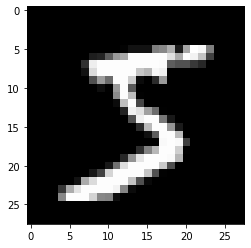

In [ ]:
plt.imshow(x_train[0, :, :],cmap='gray')

In [ ]:
model =tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(2,(3,3), (1,1), "same",use_bias=False)
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 2)         18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
filters = np.array(model.layers[0].get_weights())
filters.shape

(1, 3, 3, 1, 2)

In [ ]:
filters[0,:,:,0,0] = np.array(
    [[-1,-1,-1],
     [0,0,0],
     [1,1,1]]
)

filters[0,:,:,0,1] = np.array(
    [[-1,0,1],
     [-1,0,1],
     [-1,0,1]]
)
# [-1,0,1]
# [-1,0,1]
# [-1,0,1]
#  หาedge แนวตั้ง ขวา-ซ้าย

print(filters[0:,:,:,0,1])

[[[-1.  0.  1.]
  [-1.  0.  1.]
  [-1.  0.  1.]]]


In [ ]:
model.layers[0].set_weights(filters)
#set weight

In [ ]:
x_train = np.expand_dims(x_train, axis=3)

In [ ]:
output = model.predict(x_train[0:1, :,:,:])
output.shape

1/1 [==============================] - 0s 18ms/step


(1, 28, 28, 2)

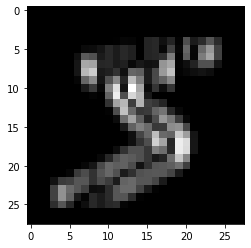

In [ ]:
plt.imshow(np.abs(output[0, :, :, 1]), cmap='gray')
#edge แนวตั้ง

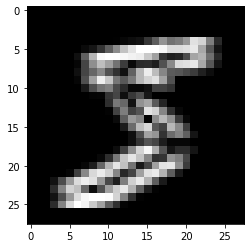

In [ ]:
plt.imshow(np.abs(output[0, :, :, 0]), cmap='gray')
#edge แนวนอน

In [ ]:
output[0, :, :, 0]

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.

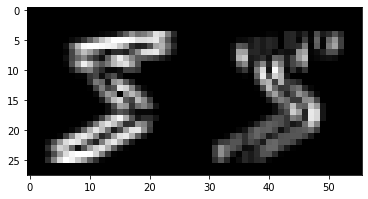

In [ ]:
plt.imshow(cv2.hconcat([np.abs(output[0, :, :, 0]),np.abs(output[0, :, :, 1])]), cmap='gray')